In [39]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import pandas as pd
import uproot as ur
import statistics
import k3d
import numpy as np
import awkward as ak
import matplotlib.colors as mcolors
from scipy.stats import norm
import mplhep as hep
import hist
from hist import Hist
from iminuit import Minuit, cost
from iminuit.cost import LeastSquares
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["legend.fontsize"] = 16

In [5]:
#Reading in the ptrig data frame
cosmicDF = pd.read_pickle(r'./COSMIC_LG30_HG50_4k_R30.pkl')

In [14]:
print(cosmicDF)
timestamps = cosmicDF["TimeStamps"]
print(timestamps)
print

      Ch_00_LG  Ch_00_HG  Ch_01_LG  Ch_01_HG  Ch_02_LG  Ch_02_HG  Ch_03_LG  \
0         79.0      68.0      60.0      70.0      65.0      67.0      67.0   
1         87.0      67.0     178.0     581.0      69.0      64.0      67.0   
2         75.0      96.0      64.0      84.0      72.0      82.0      78.0   
3         71.0      74.0      72.0      70.0      57.0      63.0      73.0   
4        133.0     336.0      85.0      64.0      64.0      60.0      64.0   
...        ...       ...       ...       ...       ...       ...       ...   
8654      57.0      76.0      63.0      58.0      56.0      47.0      53.0   
8655      64.0      72.0      49.0      52.0      52.0      56.0      60.0   
8656      58.0      57.0      58.0      50.0     134.0     404.0      61.0   
8657      66.0      43.0     116.0     381.0      56.0      55.0      57.0   
8658      58.0      70.0      55.0      69.0      56.0      66.0      59.0   

      Ch_03_HG  Ch_04_LG  Ch_04_HG  ...  Ch_22_HG  Ch_23_LG  Ch

In [19]:
cosmic = np.array(getattr(cosmicDF,"Ch_{}_LG".format("{:02d}".format(0))))
print(cosmic)
print(len(cosmic))

[79. 87. 75. ... 58. 66. 58.]
8659


In [26]:
HG_Cosmics = []

for i in range(27):
    cosmic = np.array(getattr(cosmicDF,"Ch_{}_HG".format("{:02d}".format(i))))
    HG_Cosmics.append(cosmic)
    
print(HG_Cosmics)
print(len(HG_Cosmics))

[array([68., 67., 96., ..., 57., 43., 70.]), array([ 70., 581.,  84., ...,  50., 381.,  69.]), array([ 67.,  64.,  82., ..., 404.,  55.,  66.]), array([65., 70., 94., ..., 65., 66., 68.]), array([49., 64., 54., ..., 49., 59., 66.]), array([ 68.,  60., 107., ...,  54.,  70.,  62.]), array([ 61.,  63., 734., ...,  61.,  59.,  57.]), array([67., 65., 78., ..., 57., 69., 71.]), array([ 559.,   61.,   86., ...,  644.,   70., 1079.]), array([56., 59., 78., ..., 55., 59., 63.]), array([ 81., 572.,  78., ...,  59.,  59.,  57.]), array([69., 62., 51., ..., 53., 64., 64.]), array([  80.,   66., 3102., ...,   66.,   54.,   68.]), array([ 72.,  71.,  82., ...,  54., 426.,  49.]), array([71., 68., 80., ..., 66., 55., 68.]), array([64., 58., 74., ..., 57., 54., 57.]), array([767.,  56.,  81., ..., 291.,  62., 538.]), array([ 61.,  82.,  70., ..., 284.,  56.,  62.]), array([ 67.,  69., 652., ...,  54.,  63.,  78.]), array([69., 60., 81., ..., 54., 56., 60.]), array([ 67.,  66.,  90., ...,  52.,  66.,

In [98]:
for j in range(3):
    cell_list = []
    print('Event', j)
    for i, cosmic in enumerate(HG_Cosmics):
        if cosmic[j] > 120:
            cell_list.append(i)
    print(cell_list)

Event 0
[8, 16, 24]
Event 1
[1, 10, 22]
Event 2
[6, 12, 18]


C:\Users\peter\AppData\Local\Temp\ipykernel_13876\2858641109.py:49: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


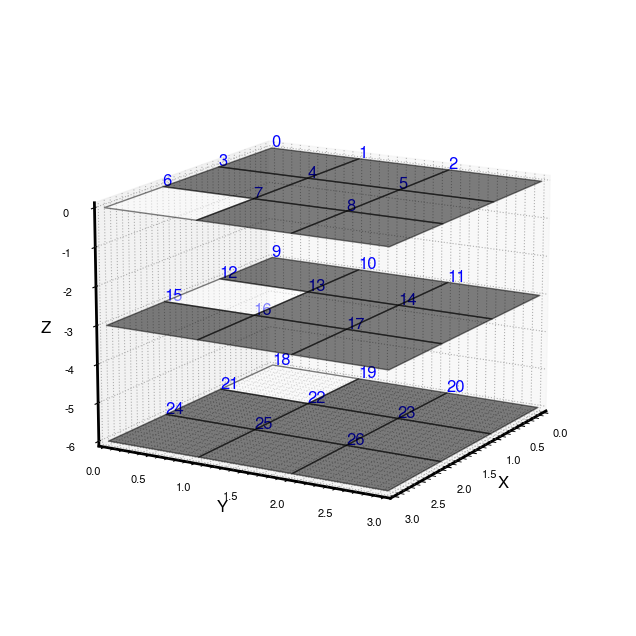

In [99]:
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the vertices and faces for three square planes, each containing a 3x3 grid of squares
planes = []
space = -3
for z in range(3):
    for y in range(3):
        for x in range(3):
            square_number = z * 9 + y + x*3
            # Define vertices for a single grid square
            square_vertices = [(x, y, space*z), (x + 1, y, space*z), (x + 1, y + 1, space*z), (x, y + 1, space*z)]
            
            # Create Poly3DCollection for the square
            square = Poly3DCollection([square_vertices], alpha=0.5)
            
            if square_number in cell_list:
                square.set_facecolor('white')  # Highlighted squares are red
            else:
                square.set_facecolor('k')
            
            square.set_edgecolor('k')
            # Add the square to the list of planes
            planes.append(square)
            
            ax.text(x, y, z*space, str(square_number), color='blue', fontsize=12)

# Add the planes (squares) to the 3D plot
for plane in planes:
    ax.add_collection3d(plane)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.zaxis.label.set_size(12)
ax.tick_params(axis='both', labelsize=8)

# Set plot limits
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_zlim(-6, 0)

ax.view_init(elev=15, azim=30)  # Set initial elevation and azimuth angles
ax.dist = 12

# Show the 3D plot
plt.show()

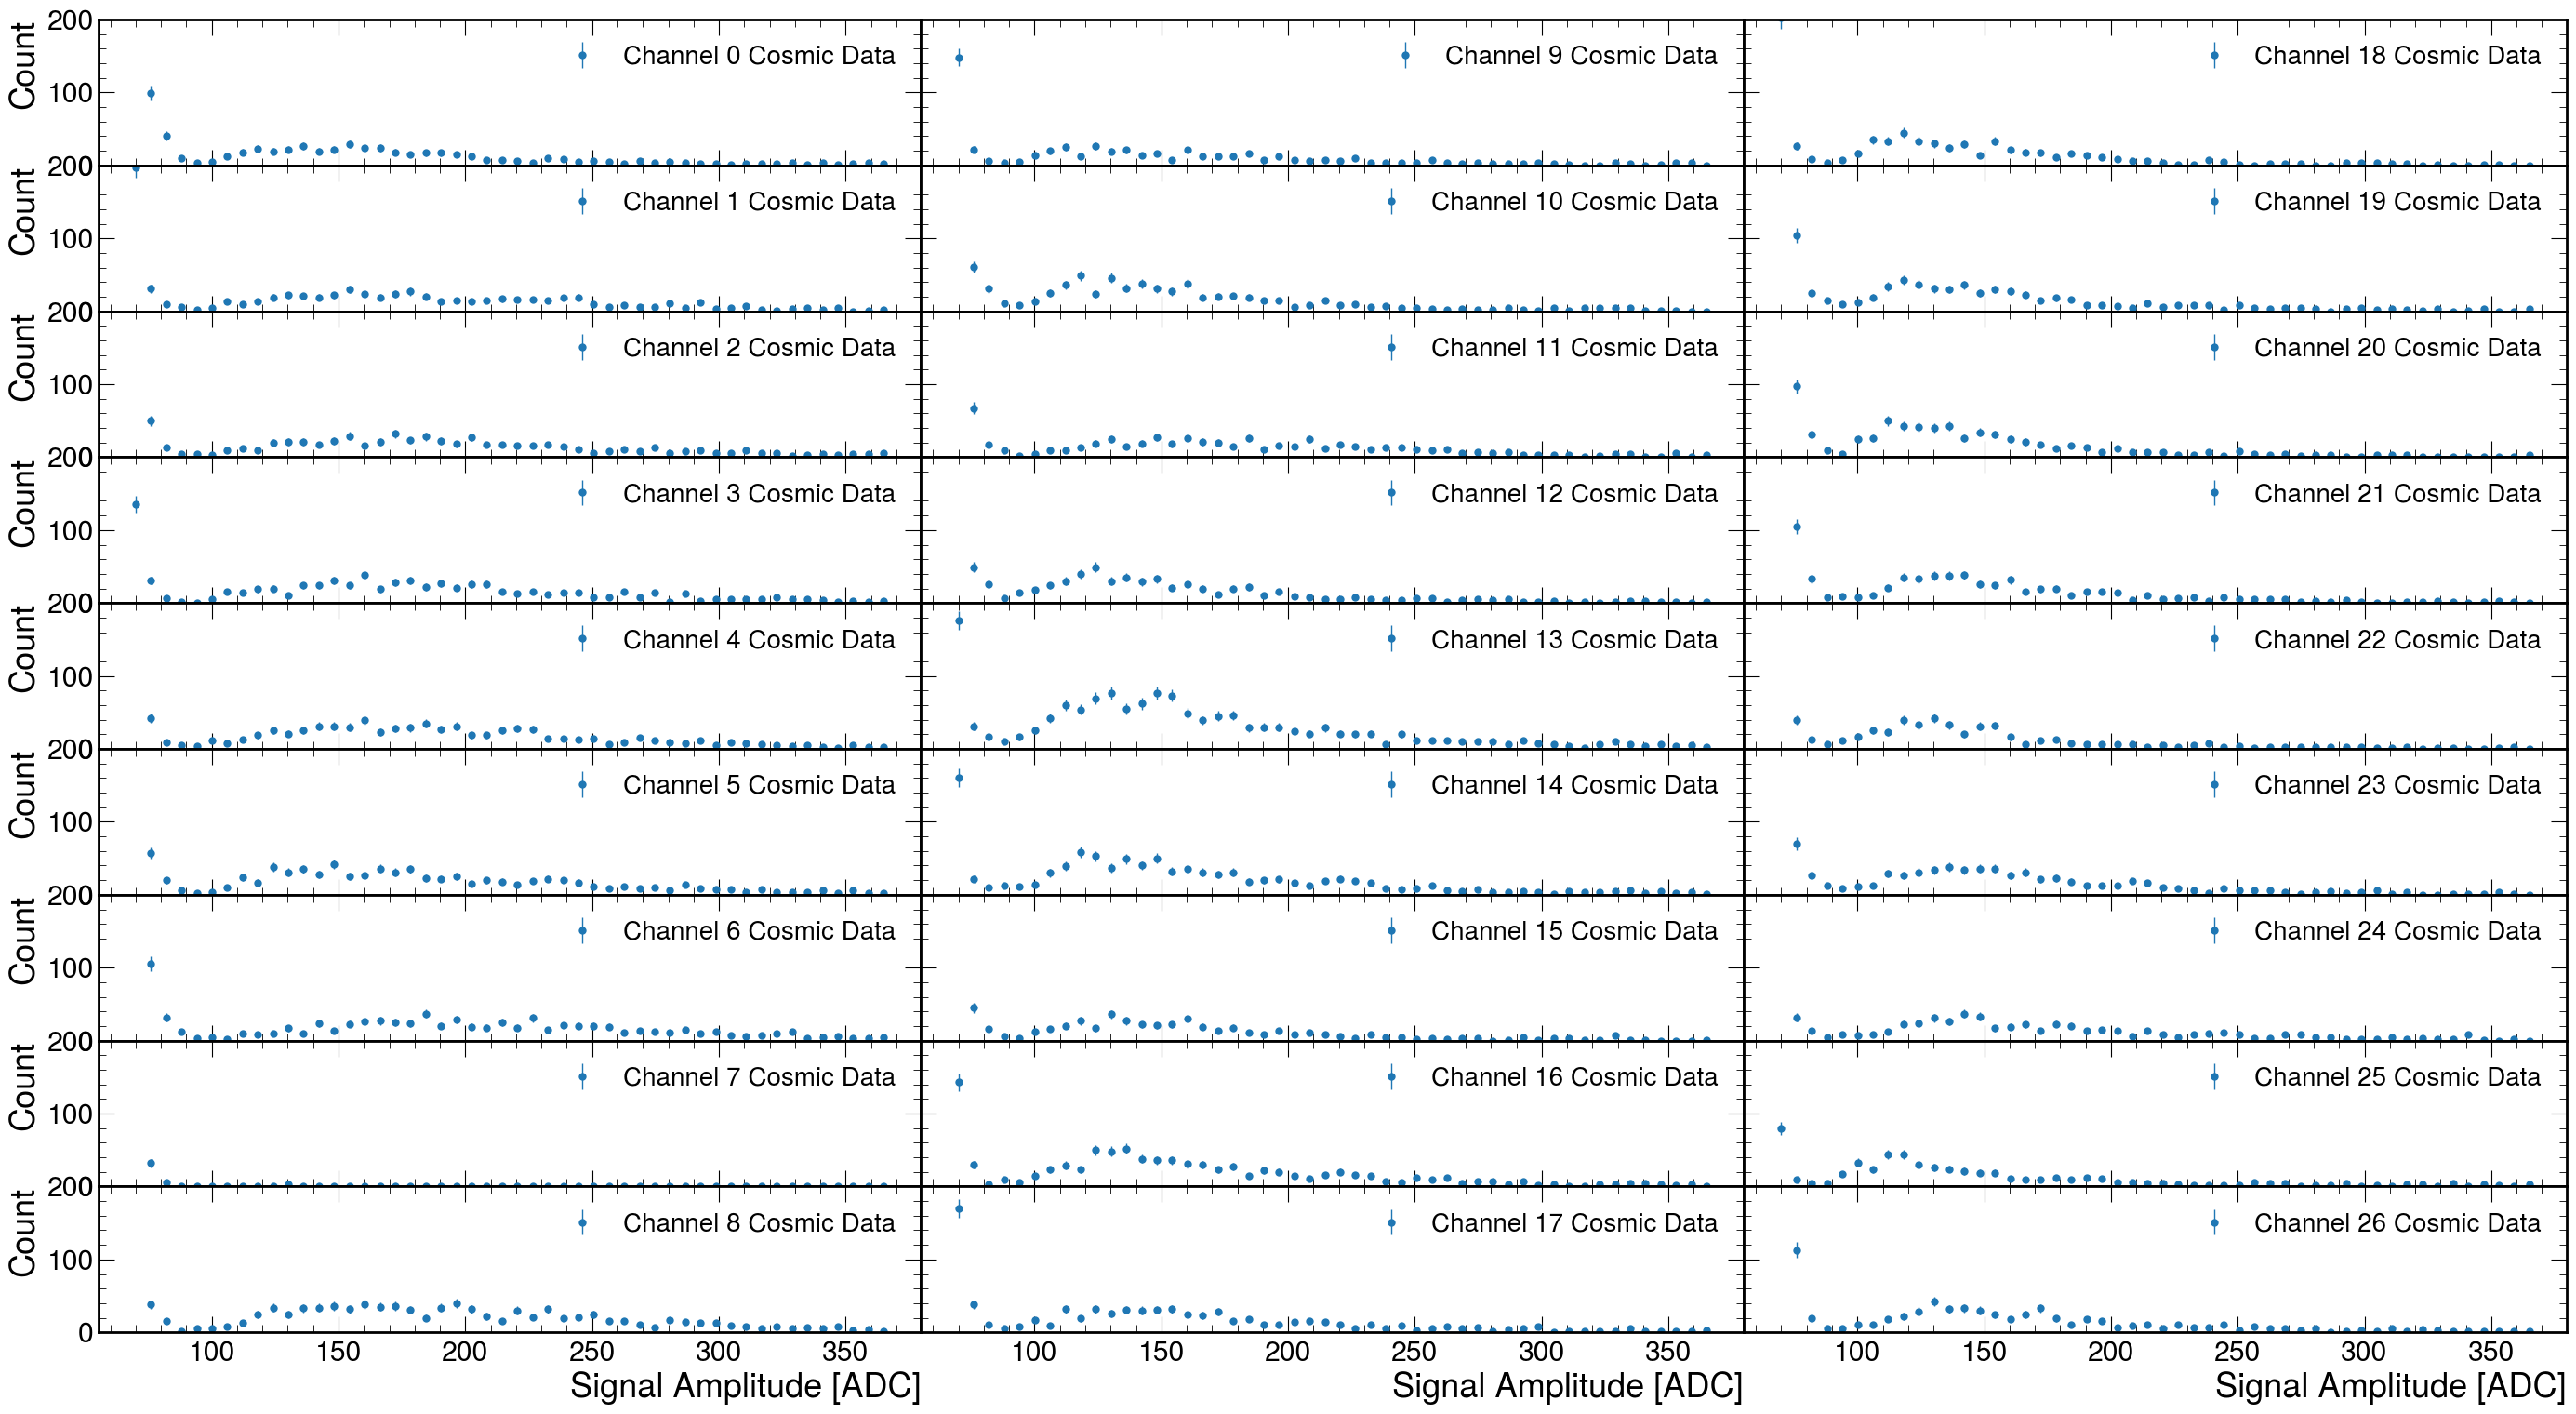

In [11]:
#plot random trigger spectra for each low gain channel. Fit to gaussian and record pedestals for cuts later

fig, axs=plt.subplots(9, 3, figsize=(0.5*len(cosmicDF.columns),15),sharey=True,sharex=True)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

mips = []
mipStds = []

for i in range(27):
    plt.sca(axs[i%9][i//9])

    h = hist.Hist(hist.axis.Regular(50, 70, 371, name="Ptrig"))
    
    cosmicCh = np.array(getattr(cosmicDF,"Ch_{}_LG".format("{:02d}".format(i))))
  
    h.fill(cosmicCh)
    #h.plot(color='tab:blue',label=f"Channel {i} Cosmic Data")  
    
    data = h.values()[()]
    bins = h.axes[0].edges[:-1]
    
    plt.errorbar(bins,data,yerr=np.sqrt(data),fmt='o',ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0,label=f"Channel {i} Cosmic Data")

    
    # Find the bin number with the maximum value
    max_bin_number = np.argmax(h.values())

    # Get the axis from the histogram
    axis = h.axes[0]

    # Find the x-coordinate corresponding to the maximum bin
    x_coordinate = axis.edges[max_bin_number]
    #mips.append(x_coordinate)
    
    
    plt.legend(loc='upper right', fontsize=20)    
    
    # Set the title and axis labels for the subplot   
    if (i+1)%9 == 0:
        plt.xlabel('Signal Amplitude [ADC]')
    if i <= 8:
        plt.ylabel('Count')
    

# Adjust the spacing between subplots
plt.ylim(0,200)
plt.tight_layout(pad=0.0)
plt.subplots_adjust(hspace=0.0, wspace=0.0)